In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [14]:
DIR = "/sf/alvra/data/p17569/res/scan_data/YAG_0.1_jet_scan006/"
#DIR = "/sf/alvra/data/p17589/raw/"
#DIR = "/sf/alvra/data/p17569/raw/BR/"

!ls -lah -rt /sf/alvra/data/p17569/res/scan_data/YAG_0.1_jet_scan006/
#!ls -lah -t /sf/alvra/data/p17589/raw/
#!ls -lah -t /sf/alvra/data/p17569/raw/BR

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 1.5G
-rw-r--r--.  1 root  p17569  49M Dec  9 01:59 YAG_0.1_jet_scan006_step0000.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 01:59 YAG_0.1_jet_scan006_step0001.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:00 YAG_0.1_jet_scan006_step0002.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:01 YAG_0.1_jet_scan006_step0003.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:01 YAG_0.1_jet_scan006_step0004.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:02 YAG_0.1_jet_scan006_step0005.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:03 YAG_0.1_jet_scan006_step0006.h5
-rw-r--r--.  1 root  p17569  50M Dec  9 02:04 YAG_0.1_jet_scan006_step0007.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:04 YAG_0.1_jet_scan006_step0008.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:05 YAG_0.1_jet_scan006_step0009.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:06 YAG_0.1_jet_scan006_step0010.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:06 YAG_0.1_jet_scan006_step0011.h5
-rw-r--r--.  1 root  p17569  49M Dec  9 02:07 YAG_0.1

# SET THE CHANNELS IN THE NEXT CELL

In [15]:
channel_PIPS_trans = "SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "SARES11-LSCP10-FNS:CH0:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM position in mm
channel_PALM_eTOF = "SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

In [16]:
fileName = "YAG_0.1_jet_scan006_step0000.h5"

BS_file = h5py.File(DIR + fileName)
#print(list(BS_file["data"].keys()))

PIPS_trans = BS_file[channel_PIPS_trans]         
Izero = BS_file[channel_Izero]
LaserDiode = BS_file[channel_LaserDiode]        
pulse_ids = BS_file[channel_pulse_ids]
#LAM_stage = BS_file[channel_LAM_delaystage]
#PALM = BS_file[channel_PALM_eTOF]

In [22]:
pulse_id_slim[0:10]

array([7301288136, 7301288140, 7301288144, 7301288148, 7301288152,
       7301288156, 7301288160, 7301288164, 7301288168, 7301288172])

In [23]:
#savedir = "/das/work/p17/p17589/DataAnalysis/"
#savedir = "/das/work/p17/p17569/"

h5f = h5py.File(savedir + 'LAM_vs_PALM_shots.h5','w')
#h5f = h5py.File(savedir + 'timeScan_3_BS.h5','w')

h5f.create_dataset('pulseIDs', data = pulse_id_slim)
h5f.create_dataset('LAM_stage', data = LAM_stage_slim)
h5f.create_dataset('PALM_eTOF', data = PALM_slim)

h5f.close()

In [9]:
LaserDiode.size


1000

<IPython.core.display.Javascript object>


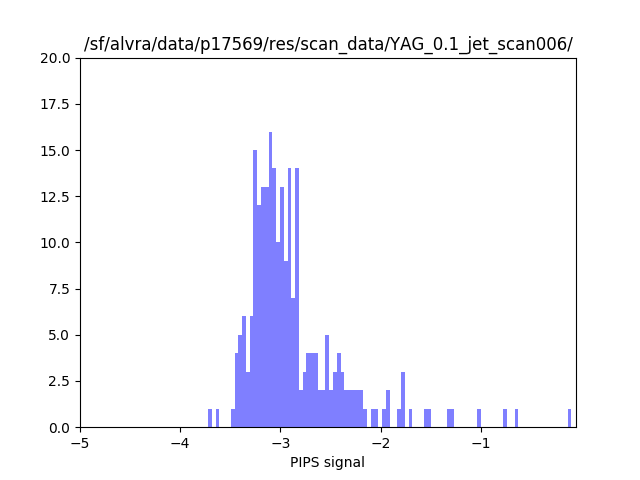

In [20]:
num_bins = 100
plt.figure()
plt.hist(PIPS_trans, num_bins, facecolor='blue', alpha=0.5)
plt.title(DIR)
plt.xlabel("PIPS signal")
plt.xlim([-5, -0.05])
plt.ylim([0, 20])

plt.show()

<IPython.core.display.Javascript object>


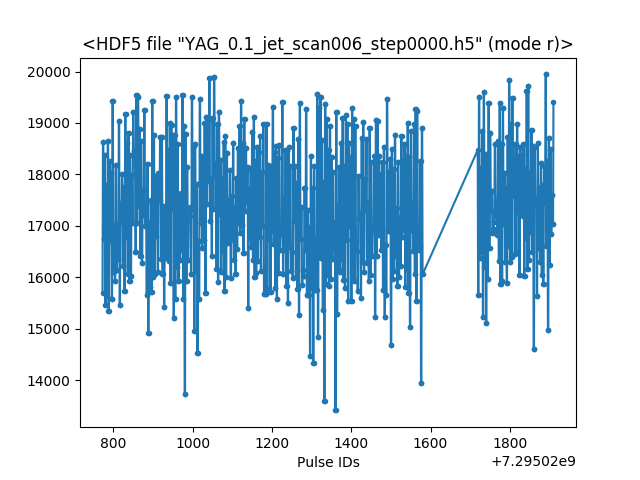

In [24]:
plt.figure()
plt.plot(pulse_ids, LaserDiode, marker='.')
#plt.plot(pulse_ids-pulse_ids[0], LaserDiode, marker='.')

plt.title(BS_file)
plt.xlabel("Pulse IDs")
plt.show()

<IPython.core.display.Javascript object>


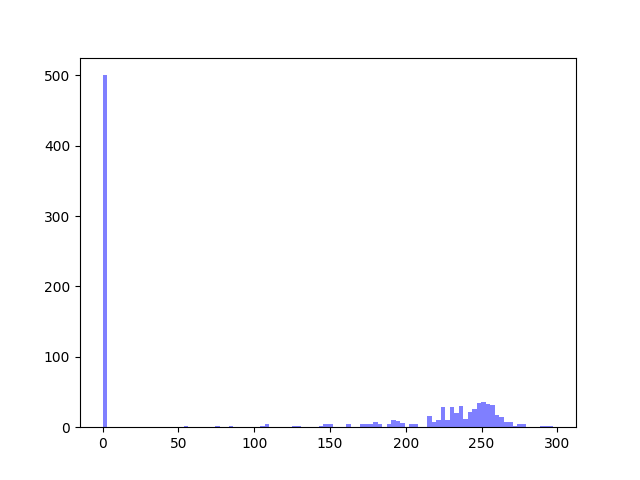

In [25]:
num_bins = 100
plt.figure()
plt.hist(Izero[:], num_bins, facecolor='blue', alpha=0.5)
plt.show()

#### Check the pattern of the pulse Ids in the H5 file. Depending how the modulo is set in bs config and to which event rate the ADC is triggered, zero (or copied values) are written in between real data.

#### Make pulse ID masks to sort out only real shots and also to distinguish FEL-on & FEL-off 

#### This is a script for laser at double reprate as FEL (laser 50 Hz, FEL 25 Hz), because FEL is the pump and laser is the probe.
First we check that the pattern is ok. 

In [13]:
#pulse_ids[0:40] % 20 == 0  # False = laser off -- this is for RepRate 5 (laser)
pulse_ids[0:40] % 4 == 0  # True = FEL shot -- this is for RepRate 25 (FEL)
pulse_ids[0:40] % 2 == 0  # False = laser off -- this is for RepRate 50 (laser)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False])

Now we write the masks (these 2 operations are anyway repeated in the loop script below)

In [14]:
#FEL_on_off = pulse_ids[:] % 20 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 5 (FEL)
FEL_on_off = pulse_ids[:] % 4 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 25 (FEL)

#FEL_on_off_2 = pulse_ids[:] % 10 == 0 #-- this is for RepRate 10 (laser)
FEL_on_off_2 = pulse_ids[:] % 2 == 0 #-- this is for RepRate 50 (laser)

In [22]:
print(pulse_ids.size)

1000


In [26]:
### this is now to loop over SEVERAL FILES

fileName_root = 'YAG_0.1_jet_scan006'
Int_threshold = 50

listfile = os.listdir(DIR)
number_files = int(len(listfile))
#number_files = 25

print ("Start processing",number_files,"files")


Delay_x = []
laser_pumped = []
err_laser_pumped = []
laser_unpumped = []
err_laser_unpumped = []
#FEL_on = []
#err_FEL_on = []
#FEL_off = []
#err_FEL_off = []
Izero_pumped = []
err_Izero_pumped = []
Izero_unpumped = []
err_Izero_unpumped = []

for j in range(number_files):

    n_ok = 0
    n_empty = 0
    n_pumped = 0
    n_unpumped = 0
    laser_pumped_loop = []
    laser_unpumped_loop = []
    FEL_on_loop = []
    FEL_off_loop = []
    Izero_pumped_loop =[]
    Izero_unpumped_loop =[]
    
    if j < 10:
        fileName_bs = fileName_root + "_step000" + str(j) + ".h5"
    else:
        fileName_bs = fileName_root + "_step00" + str(j) + ".h5"
    bs_file = h5py.File(DIR + fileName_bs, 'r')
    #PIPS_fluo = bs_file["data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"]
    pulse_ids = bs_file[channel_pulse_ids]
    Delay_loop = bs_file[channel_delay]
    
    print("step",j+1,"of",number_files,": Processing %s" % (fileName_bs))
    FEL_on_off = pulse_ids[:] % 4 == 0
    FEL_on_off_2 = pulse_ids[:] % 2 == 0 
    #nframes = 100
    nframes = pulse_ids.size
    
    for i in range(nframes):  
        
        data_fluo = bs_file[channel_PIPS_trans][i]
        data_Izero = bs_file[channel_Izero][i]
        #data_Izero_2 = bs_file[channel_Izero2][i]
        data_Laserdiode = bs_file[channel_LaserDiode][i]
        
        if FEL_on_off_2[i] and (data_Izero > Int_threshold):     # pass the filter to select laser shots 
            n_ok +=1
            if FEL_on_off[i]:                                  # This is the FEL pumped case
            
                laser_pumped_loop.append(data_Laserdiode)  
              #  FEL_on_loop.append(-data_fluo)
                Izero_pumped_loop.append(data_Izero) 
                n_pumped += 1

            else:                                             # This is the FEL un-pumped case
        
                laser_unpumped_loop.append(data_Laserdiode)
             #   FEL_off_loop.append(-data_fluo)
                Izero_unpumped_loop.append(data_Izero)
                n_unpumped += 1
                
        else:
            
            n_empty +=1
            
    print ('Total shots =',nframes,', Empty shots =',n_empty,', laser ON shots =',n_ok,', FEL pumped =',n_pumped,', FEL unpumped =',n_unpumped)
     
   # FEL_on_loop = np.array(FEL_on_loop)
   # FEL_off_loop = np.array(FEL_off_loop)
    laser_pumped_loop = np.array(laser_pumped_loop)
    laser_unpumped_loop = np.array(laser_unpumped_loop)
    Izero_pumped_loop = np.array(Izero_pumped_loop)
    Izero_unpumped_loop = np.array(Izero_unpumped_loop)
    
    
    Delay_x.append(Delay_loop[0])
    laser_pumped.append(laser_pumped_loop.mean())
    err_laser_pumped.append(laser_pumped_loop.std() / np.sqrt(n_pumped))
    laser_unpumped.append(laser_unpumped_loop.mean())
    err_laser_unpumped.append(laser_unpumped_loop.std() / np.sqrt(n_unpumped))
    #FEL_on.append(FEL_on_loop.mean())
    #err_FEL_on.append(FEL_on_loop.std() / np.sqrt(n_pumped))
    #FEL_off.append(FEL_off_loop.mean())
    #err_FEL_off.append(FEL_off_loop.std() / np.sqrt(n_unpumped))
    Izero_pumped.append(Izero_pumped_loop.mean())
    err_Izero_pumped.append(Izero_pumped_loop.std() / np.sqrt(n_pumped))
    Izero_unpumped.append(Izero_unpumped_loop.mean())
    err_Izero_unpumped.append(Izero_unpumped_loop.std() / np.sqrt(n_unpumped))


Delay_x = np.array(Delay_x)
laser_pumped = np.array(laser_pumped)
err_laser_pumped = np.array(err_laser_pumped)
laser_unpumped = np.array(laser_unpumped)
err_laser_unpumped = np.array(err_laser_unpumped)

#FEL_on = np.array(FEL_on)
#err_FEL_on = np.array(err_FEL_on)
#FEL_off = np.array(FEL_off)
#err_FEL_off = np.array(err_FEL_off)

Izero_pumped = np.array(Izero_pumped)
err_Izero_pumped = np.array(err_Izero_pumped)
Izero_unpumped = np.array(Izero_unpumped)
err_Izero_unpumped = np.array(err_Izero_unpumped)
    
print ("Job done!")

Start processing 31 files
step 1 of 31 : Processing YAG_0.1_jet_scan006_step0000.h5
Total shots = 1000 , Empty shots = 500 , laser ON shots = 500 , FEL pumped = 250 , FEL unpumped = 250
step 2 of 31 : Processing YAG_0.1_jet_scan006_step0001.h5
Total shots = 1000 , Empty shots = 500 , laser ON shots = 500 , FEL pumped = 250 , FEL unpumped = 250
step 3 of 31 : Processing YAG_0.1_jet_scan006_step0002.h5
Total shots = 1000 , Empty shots = 500 , laser ON shots = 500 , FEL pumped = 250 , FEL unpumped = 250
step 4 of 31 : Processing YAG_0.1_jet_scan006_step0003.h5
Total shots = 1000 , Empty shots = 500 , laser ON shots = 500 , FEL pumped = 250 , FEL unpumped = 250
step 5 of 31 : Processing YAG_0.1_jet_scan006_step0004.h5
Total shots = 1000 , Empty shots = 504 , laser ON shots = 496 , FEL pumped = 248 , FEL unpumped = 248
step 6 of 31 : Processing YAG_0.1_jet_scan006_step0005.h5
Total shots = 1000 , Empty shots = 500 , laser ON shots = 500 , FEL pumped = 250 , FEL unpumped = 250
step 7 of 31 :

In [47]:
laser_pumped_norm = laser_pumped / Izero_pumped
err_laser_pumped_norm = err_laser_pumped / Izero_pumped
laser_unpumped_norm = laser_unpumped / Izero_unpumped
err_laser_unpumped_norm = err_laser_unpumped / Izero_unpumped

laser_diff = laser_pumped_norm - laser_unpumped_norm
Delay_ps = (Delay_x - 140)*3.333   # factor of 2 in delay due to the delay stage is considered below.

### Run the following cell to plot pump-probe delay data

<IPython.core.display.Javascript object>


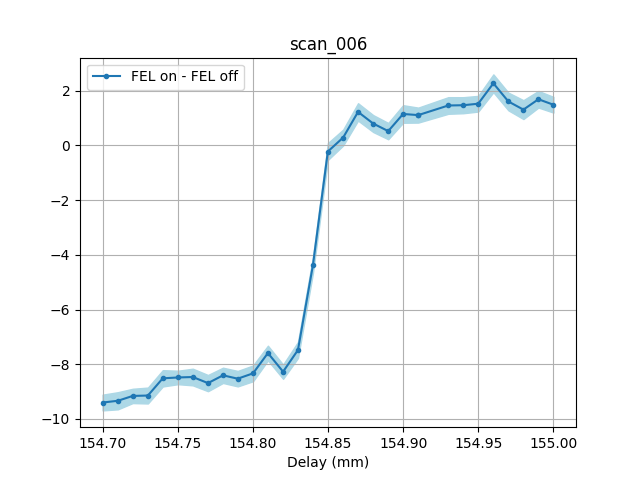

In [48]:
# Plot pump probe signal as a function of delay (stage mm)

plt.figure()
plt.plot(Delay_x, laser_diff, label="FEL on - FEL off",marker='.')

low_err= (laser_pumped_norm - laser_unpumped_norm) - np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)
high_err= (laser_pumped_norm - laser_unpumped_norm) + np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)

plt.fill_between(np.squeeze(Delay_x), low_err, high_err, color='lightblue')
plt.title("scan_006")
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig('Timescan_7_diode')

<IPython.core.display.Javascript object>


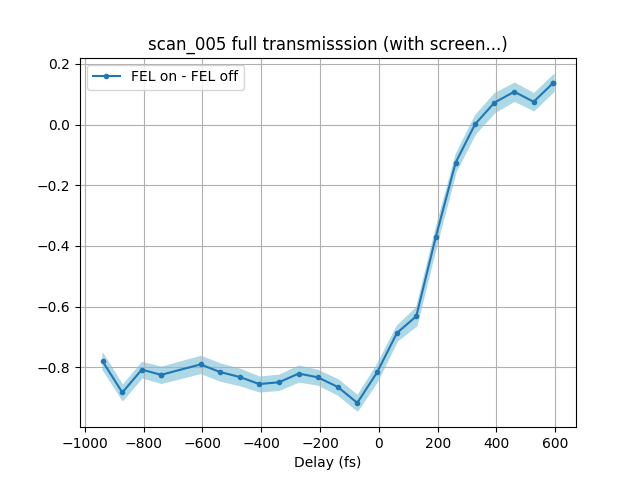

In [21]:
# Plot pump probe signal as a function of time (ps)

plt.figure()
#plt.plot(2*Delay_ps, laser_diff, label="FEL on - FEL off",marker='.')
plt.plot((2*Delay_ps-98.93)*1000, laser_diff, label="FEL on - FEL off",marker='.')

low_err= (laser_pumped_norm - laser_unpumped_norm) - np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)
high_err= (laser_pumped_norm - laser_unpumped_norm) + np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)

#plt.fill_between(np.squeeze(2*Delay_ps), low_err, high_err, color='lightblue')
plt.fill_between(np.squeeze((2*Delay_ps-98.93)*1000), low_err, high_err, color='lightblue')

plt.title("scan_005 full transmisssion (with screen...)")
plt.xlabel("Delay (fs)")
plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig('Timescan_7_diode')

In [49]:
Delay_mm_6 = Delay_x.copy()
Delay_ps_6 = Delay_ps.copy()
laser_diff_6 = laser_diff.copy()

<IPython.core.display.Javascript object>


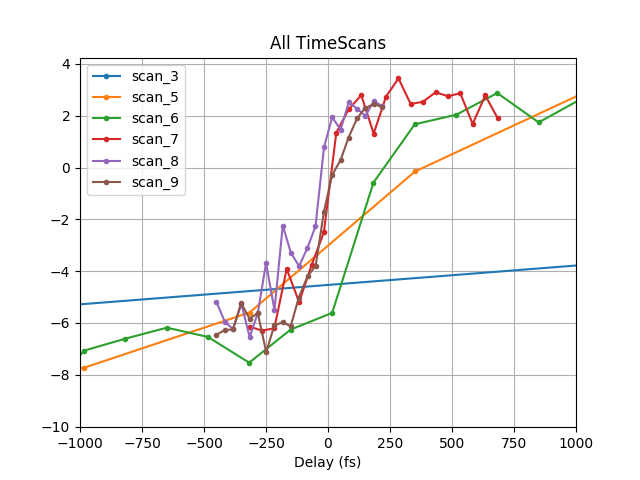

In [189]:
plt.figure()

plt.plot((2*Delay_ps_3-97.64)*1000, laser_diff_3,label="scan_3", marker='.')
plt.plot((2*Delay_ps_5-97.64)*1000, laser_diff_5,label="scan_5", marker='.')
plt.plot((2*Delay_ps_6-97.64)*1000, laser_diff_6,label="scan_6", marker='.')
plt.plot((2*Delay_ps_7-97.64)*1000, laser_diff_7,label="scan_7", marker='.')
plt.plot((2*Delay_ps_8-97.64)*1000, laser_diff_8,label="scan_8", marker='.')
plt.plot((2*Delay_ps_9-97.64)*1000, laser_diff_9,label="scan_9", marker='.')

plt.title("All TimeScans")
plt.xlabel("Delay (fs)")
plt.legend(loc="best")
plt.xlim([-1000, 1000])
plt.grid()
plt.show()
#plt.savefig('Timescans_all_diode')

<IPython.core.display.Javascript object>


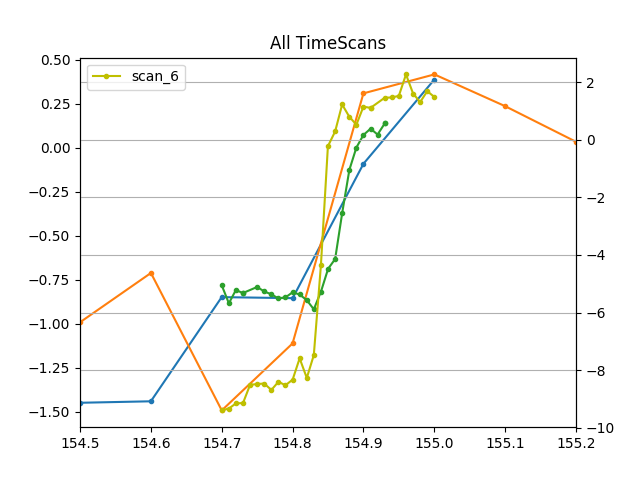

In [64]:
#plt.figure()
fig, ax1 = plt.subplots()

#ax1.plot(Delay_mm_2, laser_diff_2,label="scan_2", marker='.')
ax1.plot(Delay_mm_3, laser_diff_3,label="scan_3", marker='.')
ax1.plot(Delay_mm_4, laser_diff_4,label="scan_4", marker='.')
ax1.plot(Delay_mm_5, laser_diff_5,label="scan_5", marker='.')
ax2 = ax1.twinx()
ax2.plot(Delay_mm_6, laser_diff_6,label="scan_6", marker='.', color= 'y')


plt.title("All TimeScans")
plt.xlabel("Delay (mm)")
plt.legend(loc="upper left")
plt.xlim([154.5, 155.2])



plt.grid()
plt.show()
#plt.savefig('Timescans_all_diode')

In [ ]:
#savedir = "/das/work/p17/p17589/DataAnalysis/"
#savedir = "/das/work/p17/p17569/"

h5f = h5py.File(savedir + 'XAS_170_preEdge.h5','w')
#h5f = h5py.File(savedir + 'timeScan_3_BS.h5','w')

h5f.create_dataset('Delay_BS', data = Delay_x)
h5f.create_dataset('Energy_BS', data = Energy_x)
h5f.create_dataset('XAS_on', data = XAS_on)
h5f.create_dataset('err_XAS_on', data = err_XAS_on)
h5f.create_dataset('XAS_off', data = XAS_off)
h5f.create_dataset('err_XAS_off', data = err_XAS_off)
h5f.create_dataset('Izero_on', data = Izero_on)
h5f.create_dataset('err_Izero_on', data = err_Izero_on)
h5f.create_dataset('Izero_off', data = Izero_off)
h5f.create_dataset('err_Izero_off', data = err_Izero_off)

h5f.close()

In [ ]:
nshots = pulse_ids.size
LAM_stage_slim = []
PALM_slim = []
pulse_id_slim = []
n_ok = 0
for i in range(nshots):
    LAM_loop = BS_file[channel_LAM_delaystage][i]
    PALM_loop = BS_file[channel_PALM_eTOF][i][:]
    Pulseids_loop = BS_file[channel_pulse_ids][i]
    if FEL_on_off[i]:
        LAM_stage_slim.append(LAM_loop)
        PALM_slim.append(PALM_loop)
        pulse_id_slim.append(Pulseids_loop)
        n_ok +=1

print (n_ok)
LAM_stage_slim = np.array(LAM_stage_slim)
PALM_slim = np.array(PALM_slim)
pulse_id_slim = np.array(pulse_id_slim)